## Data Wrangling

##### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import seaborn library and ignore warning 
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

##### Import datasets

In [3]:
pop_df = pd.read_csv("Data/population_total.csv")
inet_df = pd.read_csv("Data/net_users_num.csv")
cell_df = pd.read_csv("Data/cell_phones_total.csv")
suic_df = pd.read_csv("Data/suicide_total_deaths.csv")
gini_df = pd.read_csv("Data/inequality_index_gini.csv")
gdp_df = pd.read_csv("Data/gdppercapita.csv")

##### Check imported datasets

In [4]:
# pop_df.head(3)
# gdp_df.head(3)
# inet_df.head(3)
# cell_df.head(3)
# gdp_df.head(3)
# gini_df.head(3)

*Suicide dataset contains data from 1990 to 2016; therefore I decided to perform data analysis for the years between 1990 to 2016 (included). I kept these columns using iloc method with numpy.*

##### Filtering dataset using iloc and numpy

In [5]:
# Keep only the columns 1990 - 2016 - try to do this in the function or for loop!
# suicide dataset already sliced (1990 - 2016)
# QUESTION - is there better way of doing this 
pop_df = pop_df.iloc[:, np.r_[:1, 191:218]]
inet_df = inet_df.iloc[:, :28]
cell_df = cell_df.iloc[:, np.r_[:1, 31:58]]
gini_df = gini_df.iloc[:, np.r_[:1, 24:51]]
gdp_df = gdp_df.iloc[:, np.r_[:1, 191:218]]

##### Handling null values

In [6]:
# Check null values for internet and cell usage
#suic_df.isnull().sum()
#pop_df.isnull().sum()
#gdp_df.isnull().sum()
#cell_df.isnull().sum()
#inet_df.isnull().sum()

*Only internet & cell datasets and gini index have null values. After examining these datasets I noticed a positive trend for all countries; therefore I decided to use `ffill` method (fill forward) instead of filling with mean or 0. I believe a better way to fill null values would be average values between empty cells. Any suggestions?*

In [7]:
# fill first colum [1990] with null if empty 
# (I use this to fill the first column with 0. When usind ffill to populate 0 instesd of country name.)
inet_df['1990'].fillna(0, inplace=True)
cell_df['1990'].fillna(0, inplace=True)

In [8]:
# fill null values for internet and cell phone
inet_df = inet_df.fillna(method='ffill', axis=1)
cell_df = cell_df.fillna(method='ffill', axis=1)

In [9]:
# In order to fill null values across columns (calculate mean of the rows) I took the following steps (formula: df.fillna(df.mean(), axis=1) didn't work.):
# 1. set index to country:
gini_df.set_index(['country'], inplace = True)

In [10]:
# 2. using lambda function to fill null values across rows
gini_df = gini_df.apply(lambda row: row.fillna(row.mean()), axis=1)

In [11]:
# 3. reset index (to be consistent with other dataframes)
gini_df = gini_df.reset_index()

In [12]:
# 4. Check the dataframe
gini_df.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,31.1875,31.1875,31.1875,31.1875,31.1875,31.1875,27.00,31.1875,31.1875,...,31.1875,30.00,31.1875,31.1875,31.1875,29.00,31.1875,34.60,32.90,33.70
1,Algeria,31.4500,31.4500,31.4500,31.4500,31.4500,35.3000,31.45,31.4500,31.4500,...,31.4500,31.45,31.4500,31.4500,27.6000,31.45,31.4500,31.45,31.45,31.45
2,Angola,47.3500,47.3500,47.3500,47.3500,47.3500,47.3500,47.35,47.3500,47.3500,...,47.3500,42.70,47.3500,47.3500,47.3500,47.35,47.3500,47.35,47.35,47.35


##### Unpivot dataframes

In [13]:
pop_df = pop_df.melt(id_vars = 'country', var_name = 'year', value_name = 'population_total', ignore_index=True)
inet_df = inet_df.melt(id_vars = 'country', var_name = 'year', value_name = 'internet_use', ignore_index=True)
cell_df = cell_df.melt(id_vars = 'country', var_name = 'year', value_name = 'cell_use', ignore_index=True)
suic_df = suic_df.melt(id_vars = 'country', var_name = 'year', value_name = 'suicide_total', ignore_index=True)
gini_df = gini_df.melt(id_vars = 'country', var_name = 'year', value_name = 'gini_index', ignore_index=True)
gdp_df = gdp_df.melt(id_vars = 'country', var_name = 'year', value_name = 'GDP', ignore_index=True)

*In order to compare different indicators I reshaped data with `melt` method.*

##### Merge datasets

In [14]:
# Merge datasets two by two - please see comments below
merged01 = pd.merge(pop_df, suic_df, how="inner", on=["country", "year"])
merged02 = pd.merge(cell_df, inet_df, how="inner", on=["country", "year"])
merged03 = pd.merge(gdp_df, gini_df, how="left", on=["country", "year"])
merged04 = pd.merge(merged01, merged02, how="inner", on=["country", "year"])

# Final merge
merged_df = pd.merge(merged03, merged04, how="inner", on=["country", "year"])

In [15]:
# Check merged dataset
merged_df.head(3)

,country,year,GDP,gini_index,population_total,suicide_total,cell_use,internet_use
0,Afghanistan,1990,1860,NaN,12400000,703.0,0,0
1,Albania,1990,4460,31.1875,3290000,127.0,0,0
2,Algeria,1990,10300,31.4500,25800000,806.0,470,0


*Some countries don't have data for the gini index, but I would still like to include them in my analysis. 
Why: when including only countries that has data, some countries weren't included and the results were misleading!
Top 10 and bottom 10 countries were different!!

***QUESTIONS***
*Is there a better way of merging multiple datasets in one step*
*what is the best way to double-check if the merge was successful? I checked data in a spreadsheet but didn’t find this method to be found convenient, especially when working with a large dataset, the xlxs or csv file won’t load or will crash*


In [16]:
# Export dataset for investigation - not sure if this method is good. Please see the comment above.
#merged_df.to_csv('Data/merged.csv', index=False)

##### Checking dataset (shape, null values, datatypes and duplicates) after merging

In [17]:
# Shape
merged_df.shape

(5049, 8)

In [18]:
# Duplicate rows
merged_df.duplicated().sum()

0

In [19]:
# Missing values - decide what to do with null values
merged_df.isnull().sum()

country               0
year                  0
GDP                   0
gini_index          648
population_total      0
suicide_total         0
cell_use              0
internet_use          0
dtype: int64

In [20]:
# I decided to leave null values and perform analysis on a different data set in orded to see if gini index

In [21]:
# Check individual datatypes - convert year to int
merged_df.dtypes

country              object
year                 object
GDP                   int64
gini_index          float64
population_total      int64
suicide_total       float64
cell_use             object
internet_use         object
dtype: object

#### Changing datatypes

In [22]:
# Change data types for internet use - scientific 
merged_df['internet_use'] = merged_df['internet_use'].astype(float)
merged_df['year'] = merged_df['year'].astype(int)
merged_df['cell_use'] = merged_df['cell_use'].astype(int)

In [23]:
# Round suicide & change to integer (suicide was in float)
merged_df['suicide_total'] = merged_df.suicide_total.round()
merged_df['suicide_total'] = merged_df['suicide_total'].astype(int)

In [24]:
# Check datatypes
merged_df.dtypes

country              object
year                  int32
GDP                   int64
gini_index          float64
population_total      int64
suicide_total         int32
cell_use              int32
internet_use        float64
dtype: object

#### Feature engeenering 

In [25]:
# Calculate proportions of internet users, cell users, and the number of suicides % per country and year.
merged_df['internet_use_%'] = merged_df.internet_use/merged_df.population_total*100
merged_df['cell_use_%'] = merged_df.cell_use/merged_df.population_total*100
merged_df['suicide_total_%'] = merged_df.suicide_total/merged_df.population_total*100

In [26]:
# Calculate proportions per capita (per 100,000 people) for internet users, cell users, and the number of suicides.
merged_df['internet_use_pc'] = merged_df.internet_use/merged_df.population_total*100000
merged_df['cell_use_pc'] = merged_df.cell_use/merged_df.population_total*100000
merged_df['suicide_total_pc'] = merged_df.suicide_total/merged_df.population_total*100000

In [27]:
# Check newly created columns in whole dataframe.
merged_df.head(5)

,country,year,GDP,gini_index,population_total,suicide_total,cell_use,internet_use,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,NaN,12400000,703,0,0.0,0.0,0.000000,0.005669,0.0,0.000000,5.669355
1,Albania,1990,4460,31.1875,3290000,127,0,0.0,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,10300,31.4500,25800000,806,470,0.0,0.0,0.001822,0.003124,0.0,1.821705,3.124031
3,Andorra,1990,28400,NaN,54500,5,0,0.0,0.0,0.000000,0.009174,0.0,0.000000,9.174312
4,Angola,1990,4760,47.3500,11800000,645,0,0.0,0.0,0.000000,0.005466,0.0,0.000000,5.466102


In [28]:
# Dipsplay columns in a list for faster reordering
merged_df.columns

Index(['country', 'year', 'GDP', 'gini_index', 'population_total',
       'suicide_total', 'cell_use', 'internet_use', 'internet_use_%',
       'cell_use_%', 'suicide_total_%', 'internet_use_pc', 'cell_use_pc',
       'suicide_total_pc'],
      dtype='object')

In [29]:
# Reposition the columns
merged_df = merged_df[['country', 'year', 'GDP','gini_index', 'population_total', 'cell_use',
       'internet_use', 'suicide_total',  'internet_use_%', 'cell_use_%',
       'suicide_total_%', 'internet_use_pc', 'cell_use_pc',
       'suicide_total_pc']]

In [30]:
merged_df.head()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,NaN,12400000,0,0.0,703,0.0,0.000000,0.005669,0.0,0.000000,5.669355
1,Albania,1990,4460,31.1875,3290000,0,0.0,127,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,10300,31.4500,25800000,470,0.0,806,0.0,0.001822,0.003124,0.0,1.821705,3.124031
3,Andorra,1990,28400,NaN,54500,0,0.0,5,0.0,0.000000,0.009174,0.0,0.000000,9.174312
4,Angola,1990,4760,47.3500,11800000,0,0.0,645,0.0,0.000000,0.005466,0.0,0.000000,5.466102


*For a better comparison between countries, I create new columns % of total proportions per capita (per 100,000 people).*

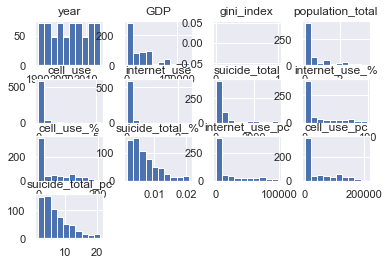

In [31]:
# Check the gini index null values
merged_df[merged_df.gini_index.isnull()].hist();

In [32]:
# Check what columns has null values for gini index:
gini_null = merged_df[merged_df.gini_index.isnull()]
gini_null.head(3)

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,NaN,12400000,0,0.0,703,0.0,0.0,0.005669,0.0,0.0,5.669355
3,Andorra,1990,28400,NaN,54500,0,0.0,5,0.0,0.0,0.009174,0.0,0.0,9.174312
5,Antigua and Barbuda,1990,17500,NaN,62500,0,0.0,1,0.0,0.0,0.001600,0.0,0.0,1.600000


In [33]:
# List the countries without data for gini index
gini_null.country.value_counts()

New Zealand                       27
Saudi Arabia                      27
Libya                             27
Grenada                           27
Bahrain                           27
Equatorial Guinea                 27
Bahamas                           27
Singapore                         27
Dominica                          27
Kuwait                            27
Antigua and Barbuda               27
Eritrea                           27
North Korea                       27
Afghanistan                       27
Andorra                           27
Oman                              27
Cambodia                          27
Cuba                              27
Marshall Islands                  27
Brunei                            27
Qatar                             27
St. Vincent and the Grenadines    27
Somalia                           27
Barbados                          27
Name: country, dtype: int64

# EDA

# Suicide and GDP: Is GDP associated with suicide rate per country?

*In this analysis I will use columns per capita (per 100,000 people); therefore I used `iloc` method to keep only columns created in feature engineering*

In [34]:
# Create df with columns per capita only
pc_df = merged_df.iloc[:, np.r_[:3, 11:14]]
pc_df.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,0.0,0.000000,5.669355
1,Albania,1990,4460,0.0,0.000000,3.860182
2,Algeria,1990,10300,0.0,1.821705,3.124031


## For all countries

#### FEW INVESTIGATING QUESTIONS

In [35]:
# Country and year with most suicides per capita - used idxmax to find the row where this information is:
most_suicides_pc = pc_df.suicide_total_pc.idxmax(axis=1)
most_suicides_pc

886

In [36]:
# Used iloc method to display data whit index found in the previous cell.
most_suicides_pc = pc_df.iloc[886,:]
most_suicides_pc

country              Russia
year                   1994
GDP                   13400
internet_use_pc     53.9189
cell_use_pc         18.7162
suicide_total_pc    51.6216
Name: 886, dtype: object

In [37]:
# Find a country and year with most suicides per capita - this is another way to get the same answer as cells above.
most_suicides_pc1 = pc_df.groupby(['country','year']).mean()['suicide_total_pc'].idxmax(axis=1)
most_suicides_pc1

('Russia', 1994)

In [38]:
# Year with most suicides per capita.
worst_year = pc_df.groupby(['year']).mean()['suicide_total_pc'].idxmax(axis=1)
worst_year

1995

In [39]:
# Country and year with least suicides per capita.
least_year = pc_df.groupby(['country','year']).mean()['suicide_total_pc'].idxmin(axis=1)
least_year

('Sao Tome and Principe', 2002)

In [40]:
# Year with least suicides per capita.
least_year = pc_df.groupby(['year']).mean()['suicide_total_pc'].idxmin(axis=1)
least_year

2015

#### HISTOGRAM

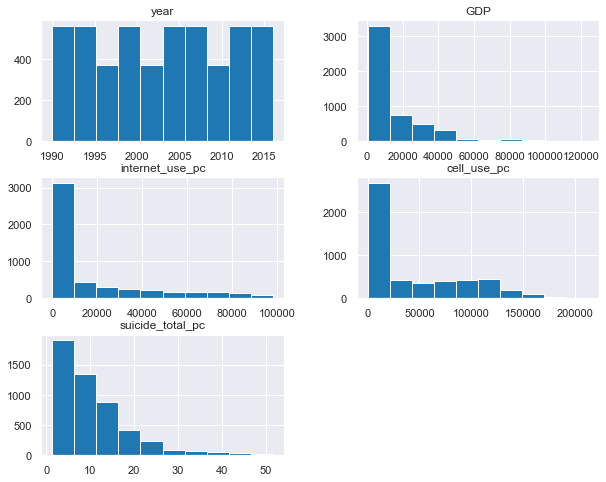

In [41]:
# Plotting histograms 
pc_df.hist(figsize=(10,8), color='#1f77b4');

*Explain the histograms* 

#### CORRELATION

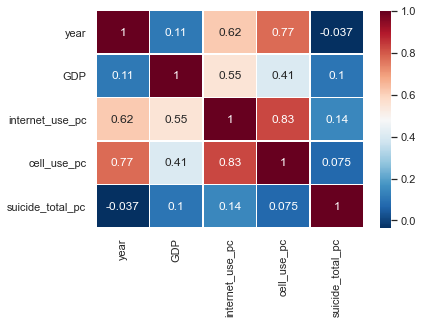

In [42]:
# Plotting correlation coeficient heat map.
pearsoncorr = pc_df.corr(method='pearson')
pearsoncorr
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

*Explain the matrix*

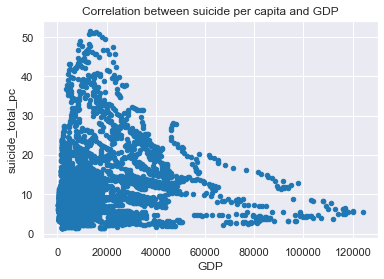

In [159]:
# Scatter plot between GDP and suicide
pc_df.plot(x='GDP', y='suicide_total_pc', kind='scatter', c='#1f77b4');
plt.title('Correlation between suicide per capita and GDP');

#### SUICIDE TREND

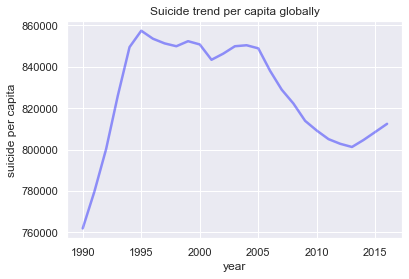

In [157]:
# Suicide trend (here I used acctual number of suicides (not per capita))
# What is the overall trend in suicide globally
suicide_trend_all = merged_df.groupby(['year']).sum()['suicide_total']
suicide_trend_all.plot(alpha=.4, color='blue', linewidth=2.5);

# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend per capita globally');

#### CELL PHONE USE

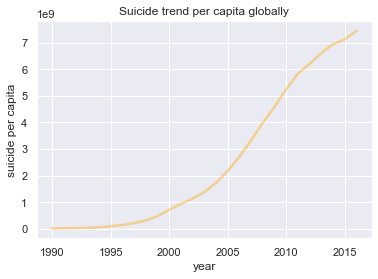

In [158]:
cell_trend_all = merged_df.groupby(['year']).sum()['cell_use']
cell_trend_all.plot(alpha=.4, color='orange', linewidth=2.5);

# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend per capita globally');

*Explant the line chart: For this analysis I was planning to analyse if cell phone use is associated with the suicide. Soley based on this dataset I can't do any meaningful conclusions. Reading more about those two variable would be finding data that categorize data by age and run additional analyses. The only couple marks I could do is to mark milestones when cell phone firstly become popular in 1990, and with smartphone in 2010. However these are just assumptions and cannot make meaningful conclusions.*

## Top 10 and bottom 10 countries with most/least suicides per capita

In [46]:
### This cell is only for reference (note on the code that might be useful in the future).
## suicide_top10_ = pc_df.groupby(['country']).agg({'suicide_total_pc': ['mean','min', 'max']})
## suicide_top10_.columns =  ['s_mean','s_min', 's_max']                                          
## suicide_top10_

In [47]:
# Top 10 countries from 1990 - 2016, get top 10 and save in a list.
suicide_top10 = pc_df.groupby(['country']).mean()['suicide_total_pc'].nlargest(10).to_frame().index.tolist()

In [49]:
# Bottom 10 countries from 1990 - 2016, get bottom 10 and save in a list.
suicide_bottom10 = pc_df.groupby(['country']).mean()['suicide_total_pc'].nsmallest(11).to_frame().index.tolist()

In [51]:
# Remove Kuwait (recognized as outlier = GPA >100,000)
suicide_bottom10.remove("Kuwait")

*Note: I found top 11, because during my analyis I found outlier - Kuwait, has GDP far above the average (100,000). Therefore, I excluded this country form analysis and replace it with next country in the bottom 10.*

In [52]:
# get the data frame for top 10
top_10_countries_suicide = pc_df[pc_df['country'].isin(suicide_top10)]
top_10_countries_suicide.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
15,Belarus,1990,8370,0.0,0.0,24.215686
55,Estonia,1990,14300,0.0,0.0,30.000000


In [53]:
# get the data frame for top 10
bottom_10_countries_suicide = pc_df[pc_df['country'].isin(suicide_bottom10)]
bottom_10_countries_suicide.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
5,Antigua and Barbuda,1990,17500,0.0,0.0,1.600000
11,Bahamas,1990,31000,0.0,750.0,2.734375


### Compare top and bottom 10 countries

#### Summary statistics & GDP comparison

In [54]:
# Top 10
top_10_countries_suicide.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2003.000000,15475.037037,24973.506555,59099.954357,33.934861
std,7.803345,7162.594634,28542.198417,58347.859254,7.761825
min,1990.000000,3610.000000,0.000000,0.000000,19.015152
25%,1996.000000,8837.500000,362.115065,488.549465,27.427362
50%,2003.000000,15100.000000,8948.192471,41595.029796,33.927374
75%,2010.000000,21900.000000,53236.651204,115182.719645,39.302554
max,2016.000000,31100.000000,87878.787879,179761.904762,51.621622


In [55]:
# Bottom 10
bottom_10_countries_suicide.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2003.000000,17559.518519,18392.023323,45707.569221,2.373274
std,7.803345,15372.655107,22390.672175,53408.665349,0.554937
min,1990.000000,1960.000000,0.000000,0.000000,1.360544
25%,1996.000000,5315.000000,54.975879,627.088134,1.949191
50%,2003.000000,9340.000000,7977.663591,20574.468085,2.331982
75%,2010.000000,29700.000000,28103.645847,77552.469939,2.720394
max,2016.000000,50500.000000,79894.179894,197088.465845,3.678571


*Describe summary stats*

In [56]:
# Box plots to compare GDP of top 10 and bottom 10

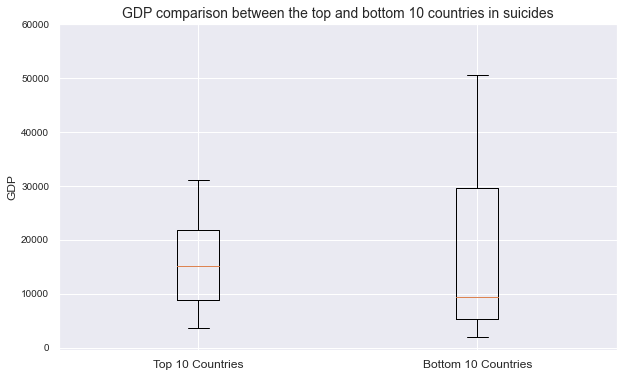

In [109]:
#Plot the Box & Whiskers
x_labels = ["Top 10 Countries", "Bottom 10 Countries"]
DGP = [top_10_countries_suicide.GDP, bottom_10_countries_suicide.GDP]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(DGP, labels=x_labels)

#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 70000, step=10000))
ax.set_title('GDP comparison between the top and bottom 10 countries in suicides',fontsize=14)
ax.set_ylabel('GDP',fontsize=12);
#ax.set_xlabel("name",fontsize=14);

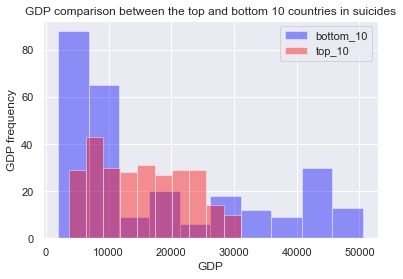

In [69]:
# histogram - GDP
bottom_10_countries_suicide.GDP.hist(alpha=.4, color='blue', label='bottom_10'), 
top_10_countries_suicide.GDP.hist(alpha=.4, color='red', label='top_10')

# legend
plt.legend()

# lebel and axis
plt.ylabel('GDP frequency')
plt.xlabel('GDP')
plt.title('GDP comparison between the top and bottom 10 countries in suicides');

#### Suicide Trend

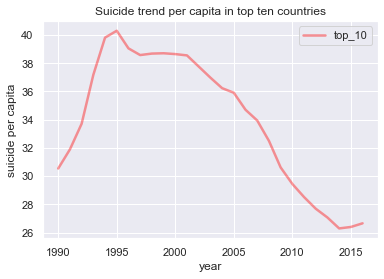

In [79]:
# Top 10 - suicide trend
trend_top10 = top_10_countries_suicide.groupby(['year']).mean()['suicide_total_pc']
trend_top10.plot(alpha=.4, color='red', label='top_10', linewidth=2.5);
# legend
plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend per capita in top ten countries');

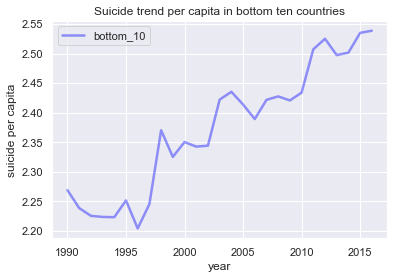

In [80]:
# Bottom 10 - suicide trend
trend_bottom10 = bottom_10_countries_suicide.groupby(['year']).mean()['suicide_total_pc']
trend_bottom10.plot(alpha=.4, color='blue', label='bottom_10', linewidth=2.5);
# legend
plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend per capita in bottom ten countries');

*Explain Trend*

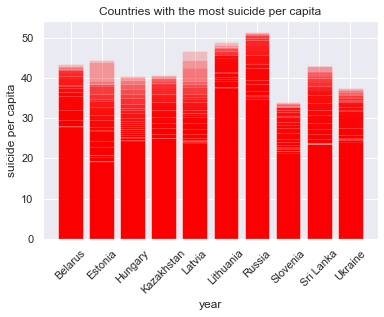

In [128]:
x_axis = top_10_countries_suicide.country
y_axis = top_10_countries_suicide.suicide_total_pc
plt.xticks(rotation = 45)
plt.bar(x_axis, y_axis, label='suicide_total_pc', alpha=.2, color='red')
# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Countries with the most suicide per capita');

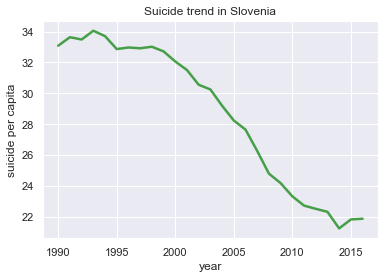

In [133]:
# Check the trend for Slovenia.
slovenia = top_10_countries_suicide.query('country == "Slovenia"')
slovenia.groupby(['year']).mean()['suicide_total_pc'].plot(alpha=.7, color='green', linewidth=2.5);
# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend in Slovenia');

In [114]:
# CHECK THE TREND

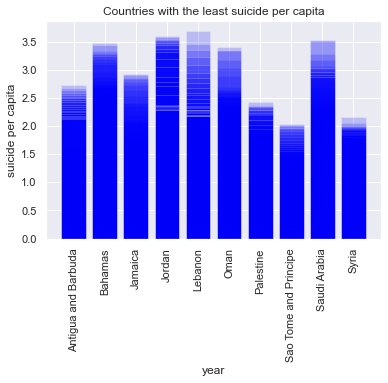

In [126]:
x_axis = bottom_10_countries_suicide.country
y_axis = bottom_10_countries_suicide.suicide_total_pc
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis, label='suicide_total_pc', alpha=.2, color='blue')
# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Countries with the least suicide per capita');

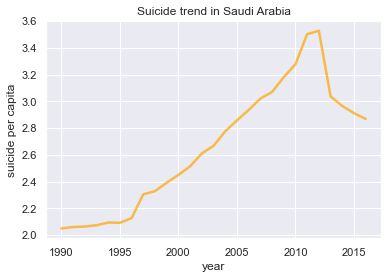

In [132]:
# Check the trend for Saudi Arabia.
saudi_arabia = bottom_10_countries_suicide.query('country == "Saudi Arabia"')
saudi_arabia.groupby(['year']).mean()['suicide_total_pc'].plot(alpha=.7, color='orange', linewidth=2.5);
# legend
#plt.legend()
# lebel and axis
plt.ylabel('suicide per capita')
plt.xlabel('year')
plt.title('Suicide trend in Saudi Arabia');

### Suicide trend line chart from 2010 - 2016

In [134]:
# Create df for only 2010 - 2016
main_df_reduced = merged_df.loc[merged_df.year > 2009,:]

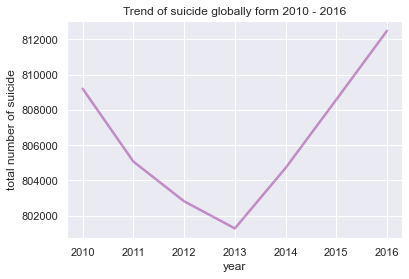

In [138]:
# Suicide trend (here I used acctual number of suicides (not per capita))
# What is the overall trend in suicide globally
suicide_trend_all_reduced = main_df_reduced.groupby(['year']).sum()['suicide_total']
suicide_trend_all_reduced.plot(alpha=.4, color='purple', label='bottom_10', linewidth=2.5);

# legend
#plt.legend()
# lebel and axis
plt.ylabel('total number of suicide')
plt.xlabel('year')
plt.title('Trend of suicide globally form 2010 - 2016');

*Explain the line chart*

#  Suicide and gini-index: Is gini index associated with suicide rate per country

In [139]:
merged_df.head()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,NaN,12400000,0,0.0,703,0.0,0.000000,0.005669,0.0,0.000000,5.669355
1,Albania,1990,4460,31.1875,3290000,0,0.0,127,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,10300,31.4500,25800000,470,0.0,806,0.0,0.001822,0.003124,0.0,1.821705,3.124031
3,Andorra,1990,28400,NaN,54500,0,0.0,5,0.0,0.000000,0.009174,0.0,0.000000,9.174312
4,Angola,1990,4760,47.3500,11800000,0,0.0,645,0.0,0.000000,0.005466,0.0,0.000000,5.466102


In [140]:
merged_df_gini = merged_df.dropna()

In [141]:
merged_df_gini.head()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
1,Albania,1990,4460,31.187500,3290000,0,0.0,127,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,10300,31.450000,25800000,470,0.0,806,0.0,0.001822,0.003124,0.0,1.821705,3.124031
4,Angola,1990,4760,47.350000,11800000,0,0.0,645,0.0,0.000000,0.005466,0.0,0.000000,5.466102
6,Argentina,1990,11400,46.924000,32600000,12000,0.0,3300,0.0,0.036810,0.010123,0.0,36.809816,10.122699
7,Armenia,1990,3740,32.176471,3540000,0,0.0,134,0.0,0.000000,0.003785,0.0,0.000000,3.785311


In [142]:
merged_df_gini.gini_index.describe()

count    4401.000000
mean       39.656598
std         8.323625
min        20.700000
25%        33.100000
50%        38.400000
75%        44.600000
max        65.800000
Name: gini_index, dtype: float64

In [143]:
# Create bins for gini index = low, medium and high (+ explain gini index!!)
# Bin edges that will be used to "cut" the data into groups
bin_edges = [20.7, 35, 44.6, 65.8] 
# Labels for the four acidity level groups
bin_names = ['low', 'medium', 'high'] 
# Creates acidity_levels column
merged_df_gini['gini_index_cat'] = pd.cut(merged_df_gini['gini_index'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
merged_df_gini.head()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc,gini_index_cat
1,Albania,1990,4460,31.187500,3290000,0,0.0,127,0.0,0.000000,0.003860,0.0,0.000000,3.860182,low
2,Algeria,1990,10300,31.450000,25800000,470,0.0,806,0.0,0.001822,0.003124,0.0,1.821705,3.124031,low
4,Angola,1990,4760,47.350000,11800000,0,0.0,645,0.0,0.000000,0.005466,0.0,0.000000,5.466102,high
6,Argentina,1990,11400,46.924000,32600000,12000,0.0,3300,0.0,0.036810,0.010123,0.0,36.809816,10.122699,high
7,Armenia,1990,3740,32.176471,3540000,0,0.0,134,0.0,0.000000,0.003785,0.0,0.000000,3.785311,low


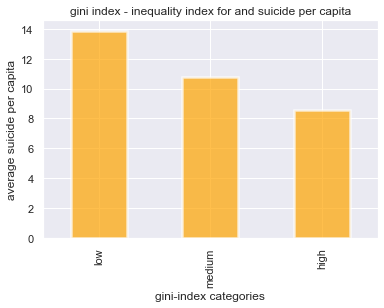

In [153]:
gini_bins = merged_df_gini.groupby('gini_index_cat').mean().suicide_total_pc
gini_bins.plot(kind='bar', alpha=.7, color='orange', linewidth=2.5);
# legend
#plt.legend()
# lebel and axis
plt.ylabel('average suicide per capita')
plt.xlabel('gini-index categories')
plt.title('gini index - inequality index for and suicide per capita');

# Suicide and cell phone use 

In [160]:
# Use of cell phone - line chart on the same graph??


# From 1990 - 2000

In [161]:
# Create df for only 1990 - 2000
main_df_reduced_cell = merged_df.loc[merged_df.year < 2001,:]
main_df_reduced_cell.tail()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
2052,Venezuela,2000,14600,48.670000,24200000,5450000,813000.0,2120,3.359504,22.520661,0.008760,3359.504132,22520.661157,8.760331
2053,Vietnam,2000,2570,36.130000,79900000,789000,203000.0,7280,0.254068,0.987484,0.009111,254.067584,987.484355,9.111389
2054,Yemen,2000,4000,35.466667,17400000,32000,14400.0,754,0.082759,0.183908,0.004333,82.758621,183.908046,4.333333
2055,Zambia,2000,2130,52.688889,10400000,98900,19900.0,880,0.191346,0.950962,0.008462,191.346154,950.961538,8.461538
2056,Zimbabwe,2000,2950,43.200000,11900000,266000,47700.0,1550,0.400840,2.235294,0.013025,400.840336,2235.294118,13.025210


In [162]:
# Create df with columns per capita only
pc_df_reduced_cell = main_df_reduced_cell.iloc[:, np.r_[:3, 11:14]]
pc_df_reduced_cell.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,0.0,0.000000,5.669355
1,Albania,1990,4460,0.0,0.000000,3.860182
2,Algeria,1990,10300,0.0,1.821705,3.124031


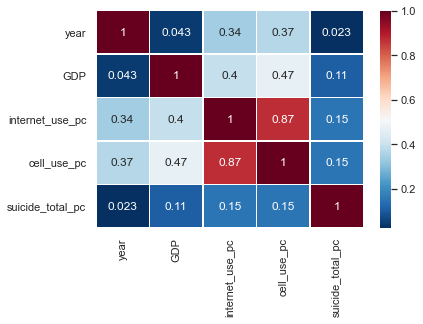

In [163]:
# Plotting correlation coeficient heat map.
pearsoncorr_reduced_cell = pc_df_reduced_cell.corr(method='pearson')
pearsoncorr_reduced_cell
sns.heatmap(pearsoncorr_reduced_cell, 
            xticklabels=pearsoncorr_reduced_cell,
            yticklabels=pearsoncorr_reduced_cell,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

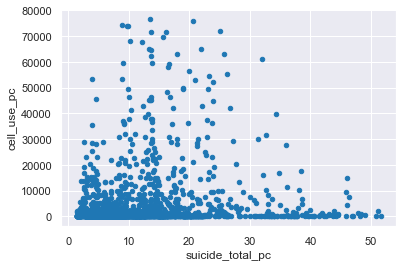

In [164]:
# Scatter plot between GDP and suicide
pc_df_reduced_cell.plot(y='cell_use_pc', x='suicide_total_pc', kind='scatter', c='#1f77b4');

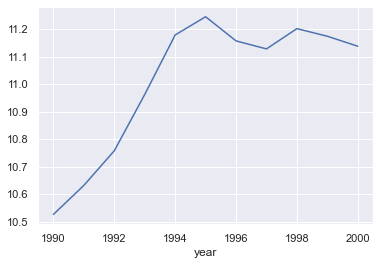

In [165]:
# Line chart for suicide and phone use
cell_use = pc_df_reduced_cell.groupby(['year']).mean()['suicide_total_pc'].plot();
cell_use;

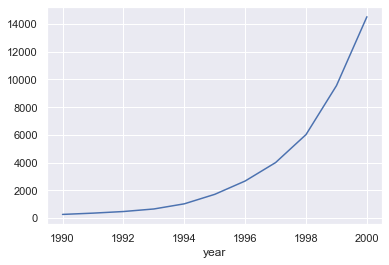

In [166]:
# Line chart for suicide and phone use
cell_use1 = pc_df_reduced_cell.groupby(['year']).mean()['cell_use_pc'].plot();
cell_use1;

# From 2001 - 2016

In [167]:
# Create df for only 2001 - 2016
main_df_reduced_cell1 = merged_df.loc[merged_df.year > 2000,:]
main_df_reduced_cell1.head()

,country,year,GDP,gini_index,population_total,cell_use,internet_use,suicide_total,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
2057,Afghanistan,2001,646,NaN,21600000,0,1020.0,1300,0.004722,0.000000,0.006019,4.722222,0.000000,6.018519
2058,Albania,2001,5950,31.1875,3130000,393000,10200.0,184,0.325879,12.555911,0.005879,325.878594,12555.910543,5.878594
2059,Algeria,2001,10400,31.4500,31500000,100000,203000.0,1110,0.644444,0.317460,0.003524,644.444444,317.460317,3.523810
2060,Andorra,2001,31800,NaN,67300,29400,7100.0,6,10.549777,43.684993,0.008915,10549.777117,43684.992571,8.915305
2061,Angola,2001,3920,47.3500,16900000,75000,23000.0,842,0.136095,0.443787,0.004982,136.094675,443.786982,4.982249


In [168]:
# Create df with columns per capita only
pc_df_reduced_cell1 = main_df_reduced_cell1.iloc[:, np.r_[:3, 11:14]]
pc_df_reduced_cell1.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
2057,Afghanistan,2001,646,4.722222,0.000000,6.018519
2058,Albania,2001,5950,325.878594,12555.910543,5.878594
2059,Algeria,2001,10400,644.444444,317.460317,3.523810


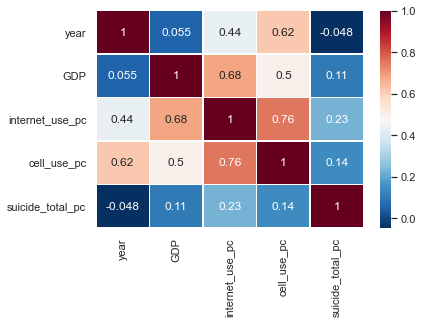

In [169]:
# Plotting correlation coeficient heat map.
pearsoncorr_reduced_cell1 = pc_df_reduced_cell1.corr(method='pearson')
pearsoncorr_reduced_cell1
sns.heatmap(pearsoncorr_reduced_cell1, 
            xticklabels=pearsoncorr_reduced_cell1,
            yticklabels=pearsoncorr_reduced_cell1,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

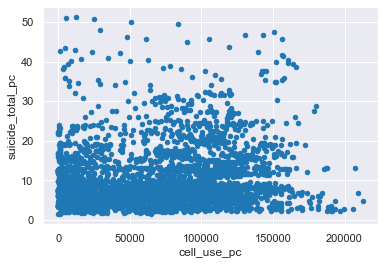

In [170]:
# Scatter plot between GDP and suicide
pc_df_reduced_cell1.plot(x='cell_use_pc', y='suicide_total_pc', kind='scatter', c='#1f77b4');

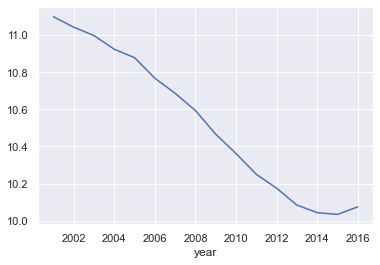

In [171]:
# Line chart for suicide and phone use
cell_use11 = pc_df_reduced_cell1.groupby(['year']).mean()['suicide_total_pc'].plot();
cell_use11;

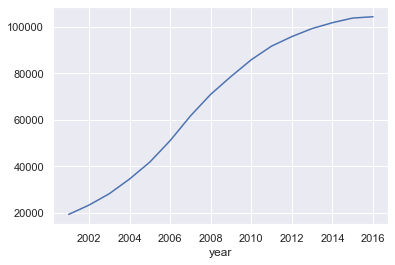

In [172]:
# Line chart for suicide and phone use
cell_use111 = pc_df_reduced_cell1.groupby(['year']).mean()['cell_use_pc'].plot();
cell_use111;

In [173]:
# focus on the years 1990 + 10years; things around 2000 and 2010! explore suicide and cell use!!

In [174]:
# look for the whole year
